In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# Definir la matriz de transición
matriz_transicion = np.array([
    [0.60, 0.30, 0.10],
    [0.75, 0.15, 0.10],
    [0.89, 0.01, 0.10]
])

# Definir los tiempos promedio en minutos
tiempos = np.array([12, 20, 31])


In [45]:
# Función para realizar una transición según la matriz de transición
def siguiente_estado(estado_actual):
    return np.random.choice([0, 1, 2], p=matriz_transicion[estado_actual])


In [46]:
# Simular el proceso
def simular_proceso(estado_inicial, max_iteraciones=100):
    estado = estado_inicial
    tiempo_total_minutos = 0
    iteraciones = 0
    conteo_estados = np.zeros(3)
    
    while estado != -1 and iteraciones < max_iteraciones:
        tiempo_total_minutos += tiempos[estado]
        conteo_estados[estado] += 1
        estado = siguiente_estado(estado)
        iteraciones += 1
    
    tiempo_total_horas = tiempo_total_minutos / 60
    return tiempo_total_horas, conteo_estados, iteraciones

# Inicializar con el estado "Fácil" (0)
estado_inicial = 0
tiempo_total_horas, conteo_estados, iteraciones = simular_proceso(estado_inicial)


Tiempo total estimado: 26.33 horas
Conteo de estados: Fácil: 69.0, Complicada: 19.0, Muy Compleja: 12.0
Iteraciones: 100


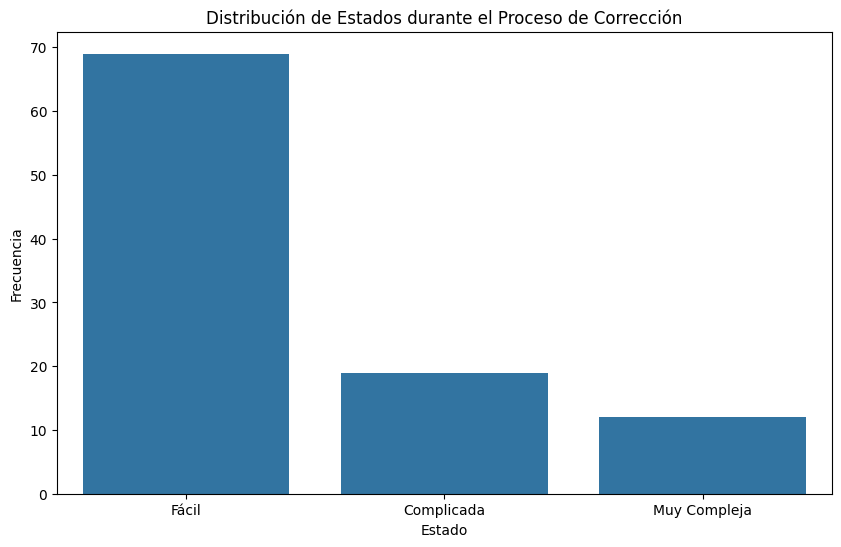

In [47]:
# Mostrar resultados
print(f"Tiempo total estimado: {tiempo_total_horas:.2f} horas")
print(f"Conteo de estados: Fácil: {conteo_estados[0]}, Complicada: {conteo_estados[1]}, Muy Compleja: {conteo_estados[2]}")
print(f"Iteraciones: {iteraciones}")

# Visualizar los resultados
etiquetas = ['Fácil', 'Complicada', 'Muy Compleja']
plt.figure(figsize=(10, 6))
sns.barplot(x=etiquetas, y=conteo_estados)
plt.title('Distribución de Estados durante el Proceso de Corrección')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.show()


In [48]:
def simular_proceso_con_tiempo(estado_inicial, max_iteraciones=100):
    estado = estado_inicial
    tiempo_total_minutos = 0
    lista_tiempos_minutos = []
    iteraciones = 0
    
    while estado != -1 and iteraciones < max_iteraciones:
        tiempo_total_minutos += tiempos[estado]
        lista_tiempos_minutos.append(tiempo_total_minutos)
        estado = siguiente_estado(estado)
        iteraciones += 1
    
    lista_tiempos_horas = [t / 60 for t in lista_tiempos_minutos]
    return tiempo_total_minutos / 60, lista_tiempos_horas, iteraciones

tiempo_total_horas, lista_tiempos_horas, iteraciones = simular_proceso_con_tiempo(estado_inicial)


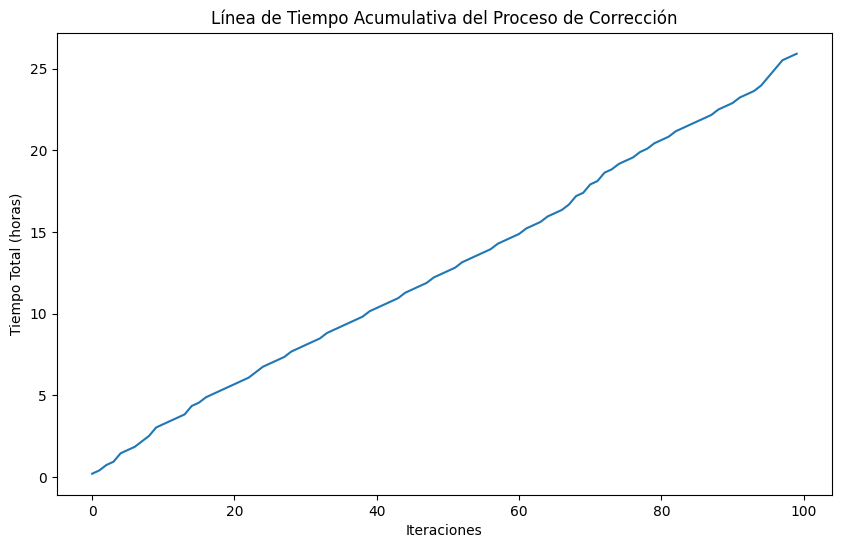

In [49]:
# Visualizar la línea de tiempo acumulativa
plt.figure(figsize=(10, 6))
plt.plot(lista_tiempos_horas)
plt.title('Línea de Tiempo Acumulativa del Proceso de Corrección')
plt.xlabel('Iteraciones')
plt.ylabel('Tiempo Total (horas)')
plt.show()
